# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [110]:
dataset = pd.read_csv('/content/drive/MyDrive/Data/SeoulBikeData.csv', encoding= 'unicode_escape')

In [111]:
dataset.head(30)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [113]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [114]:
dataset['Hour'].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

#EDA

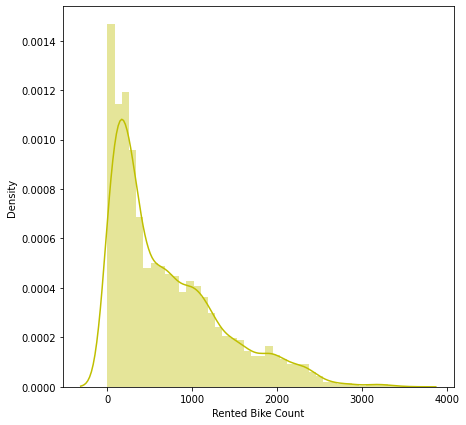

In [115]:
# dependent variable Rented Bike Count
plt.figure(figsize=(7,7))
sns.distplot(dataset['Rented Bike Count'], color ='y')


In [116]:
# Numerical features

numerical_features = dataset.describe().columns

In [117]:
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

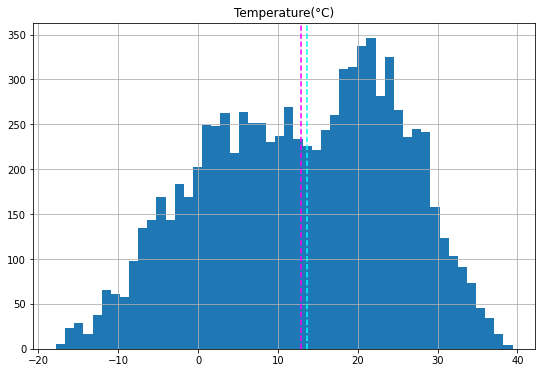

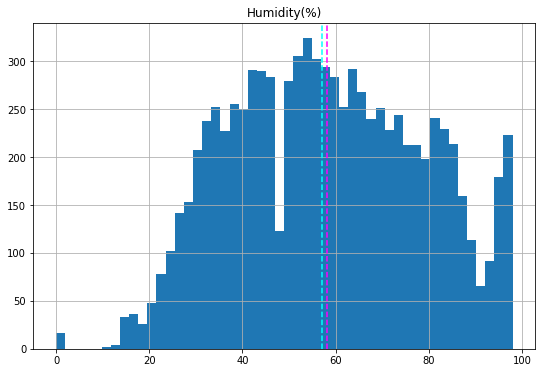

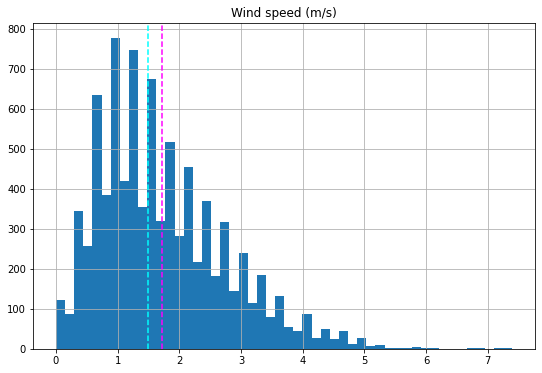

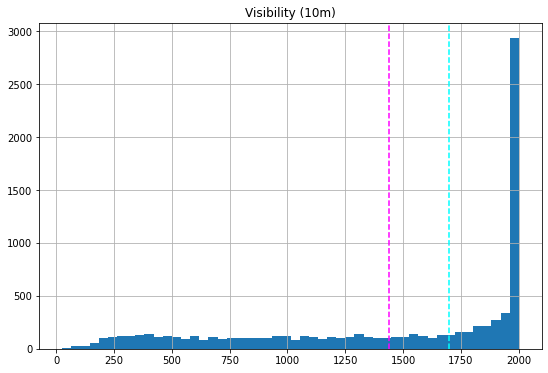

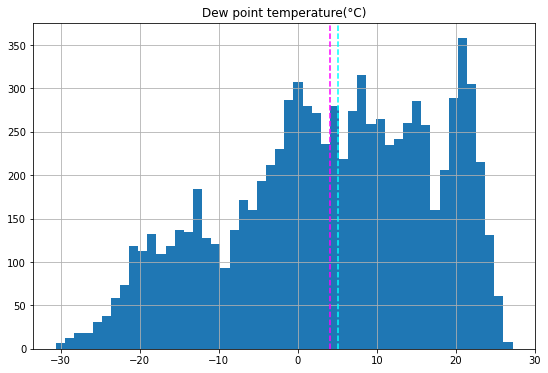

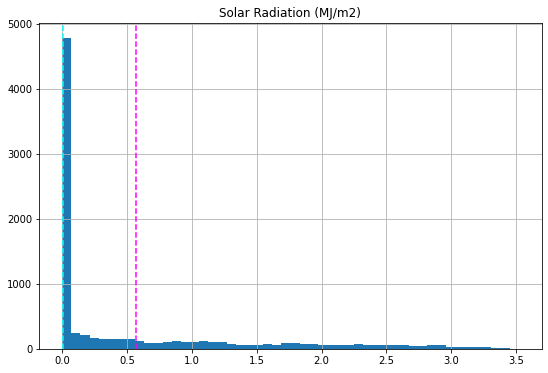

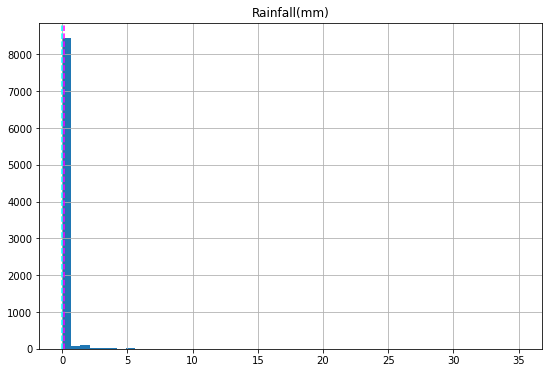

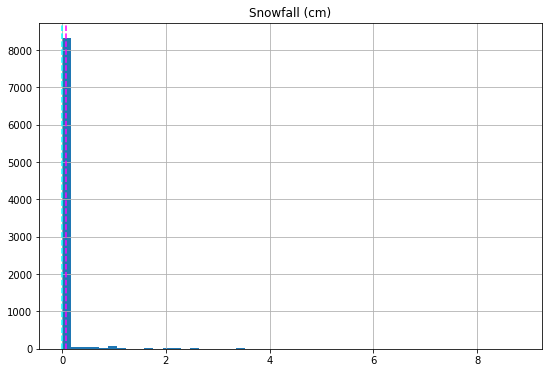

In [118]:
# Let's see among the numerical features(independent features) one that following normal disribution
# features plot shows the yearly distribution(from dec 2017 to nov 2018) at zero hour. 
for fea in numerical_features[2:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = dataset[fea]
  feature.hist(bins = 50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='--')
  ax.axvline(feature.median(), color='cyan', linestyle='--')
  ax.set_title(fea)
plt.show()


In [119]:
dataset['Visibility (10m)'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: Visibility (10m), Length: 1789, dtype: int64

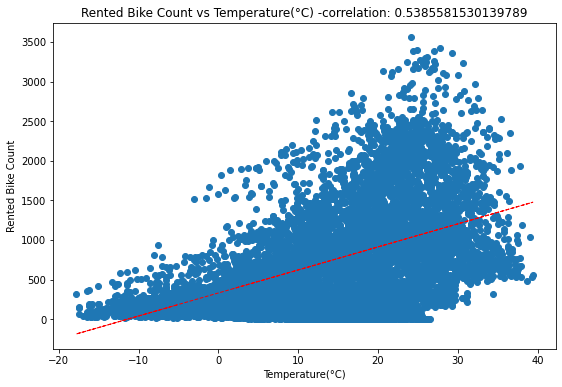

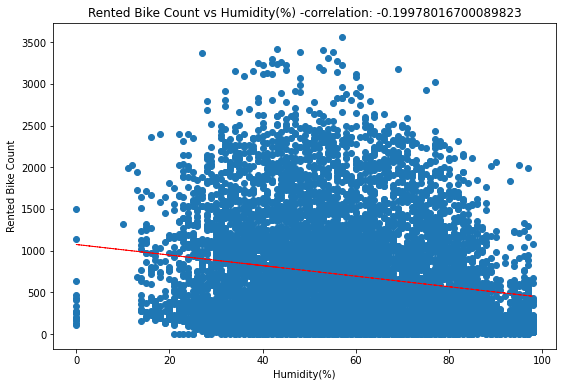

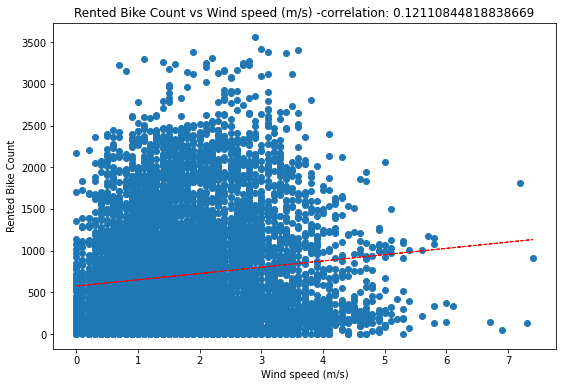

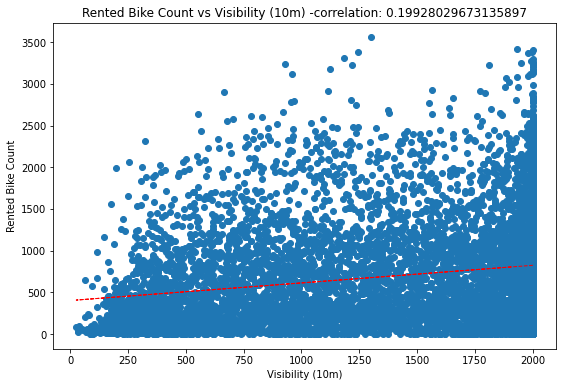

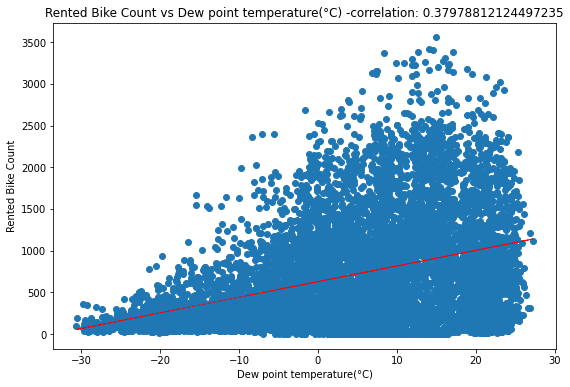

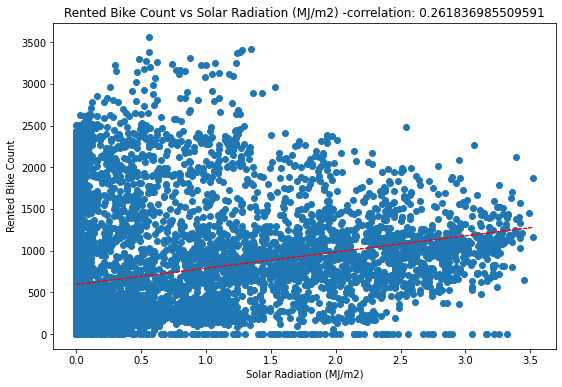

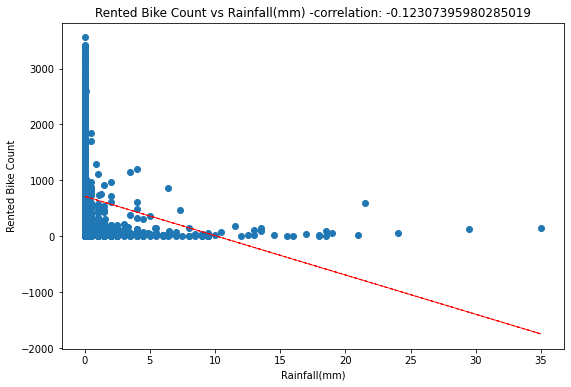

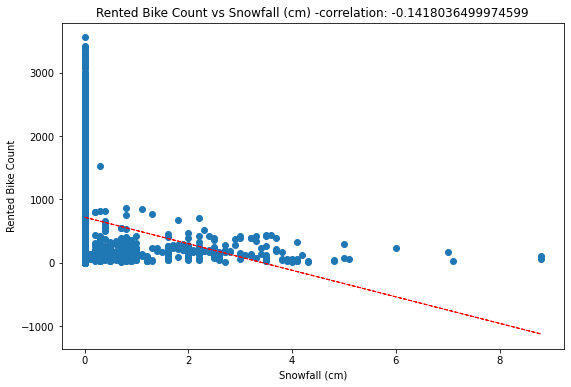

In [120]:
corr_dict = {}
for fea in numerical_features[2:]:
  
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = dataset[fea]
  label = dataset['Rented Bike Count']
  correlation = feature.corr(label)
  corr_dict[fea] = correlation
  plt.scatter(x=feature, y= label)
  plt.xlabel(fea)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs '+fea+' -correlation: '+str(correlation))
  z = np.polyfit(dataset[fea], dataset['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(dataset[fea])

  plt.plot(dataset[fea], y_hat, 'r--', lw=1)
plt.show()

In [121]:
corr_dict

{'Dew point temperature(°C)': 0.37978812124497235,
 'Humidity(%)': -0.19978016700089823,
 'Rainfall(mm)': -0.12307395980285019,
 'Snowfall (cm)': -0.1418036499974599,
 'Solar Radiation (MJ/m2)': 0.261836985509591,
 'Temperature(°C)': 0.5385581530139789,
 'Visibility (10m)': 0.19928029673135897,
 'Wind speed (m/s)': 0.12110844818838669}

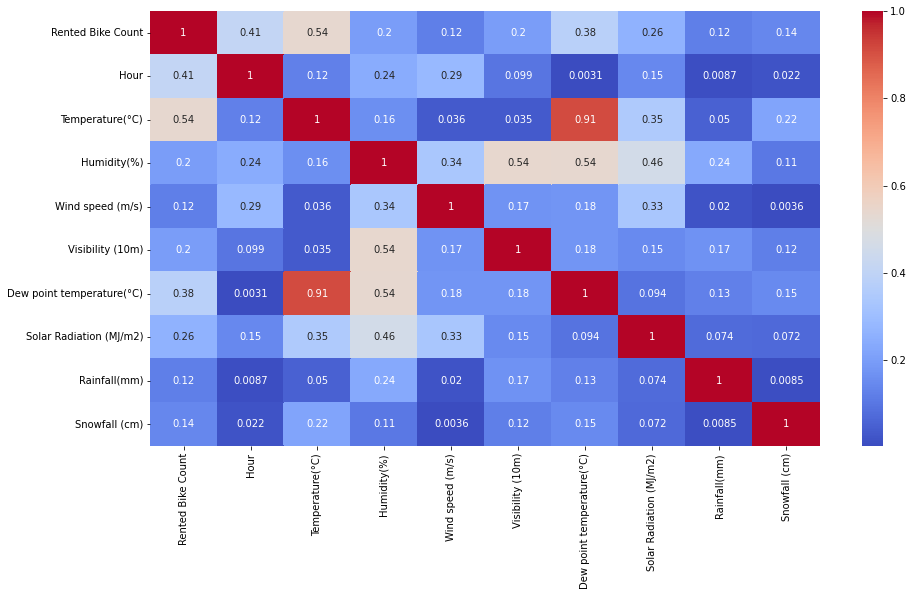

In [122]:
# Heatmap

plt.figure(figsize =(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap ='coolwarm')

In [123]:
numerical_features = numerical_features.tolist()

In [124]:
print(numerical_features)

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [179]:
dataset['temp_dewtemp'] =  0.7*dataset['Temperature(°C)'] + 0.3*dataset['Dew point temperature(°C)']

In [126]:
# Humidity is related with visibility not very strongly
dataset['hum_vis'] =  0.6*dataset['Visibility (10m)'] + 0.4*dataset['Humidity(%)']

In [127]:
# Multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return(vif)

In [180]:
dataset.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'temp_dewtemp', 'hum_vis', 'seas_Autumn',
       'seas_Spring', 'seas_Summer', 'seas_Winter'],
      dtype='object')

In [129]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Temperature(°C)', 'Dew point temperature(°C)', 'Visibility (10m)', 'Humidity(%)', 'Rented Bike Count']]])


,variables,VIF
0,Hour,3.784493
1,Wind speed (m/s),4.304964
2,Solar Radiation (MJ/m2),1.782708
3,Rainfall(mm),1.045160
4,Snowfall (cm),1.048652
5,temp_dewtemp,1.755004
6,hum_vis,4.086764


Variables' VIF values are under 5. Means they are non corelated.

In [130]:
# Categorical features

categorical_features = dataset.describe(include=['object', 'category']).columns

In [131]:
categorical_features.tolist()

['Date', 'Seasons', 'Holiday', 'Functioning Day']

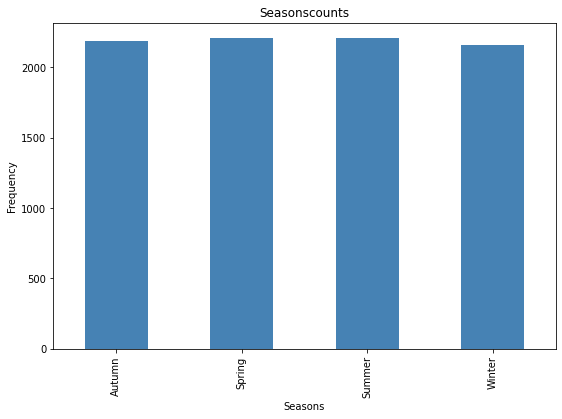

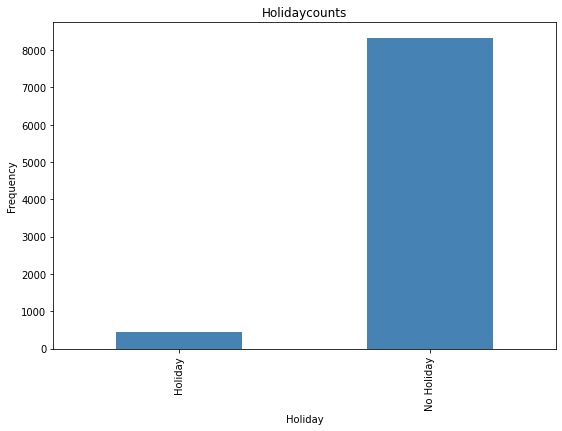

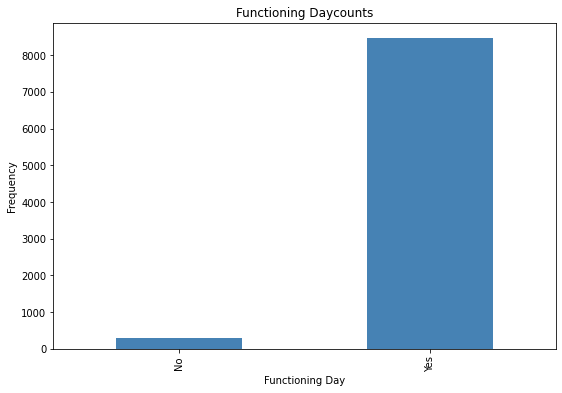

In [132]:
for col in categorical_features[1:]:
  counts = dataset[col].value_counts().sort_index()
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  counts.plot.bar(ax=ax, color='steelblue')
  ax.set_title(col+'counts')
  ax.set_xlabel(col)
  ax.set_ylabel('Frequency')
plt.show()


In [133]:
dataset['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [134]:
dataset[dataset['Holiday']=='Holiday']['Functioning Day'].value_counts()

Yes    408
No      24
Name: Functioning Day, dtype: int64

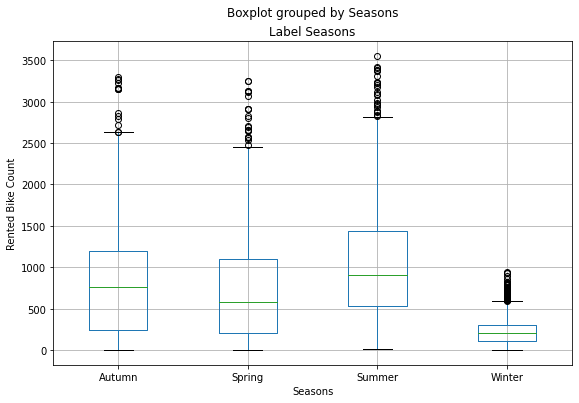

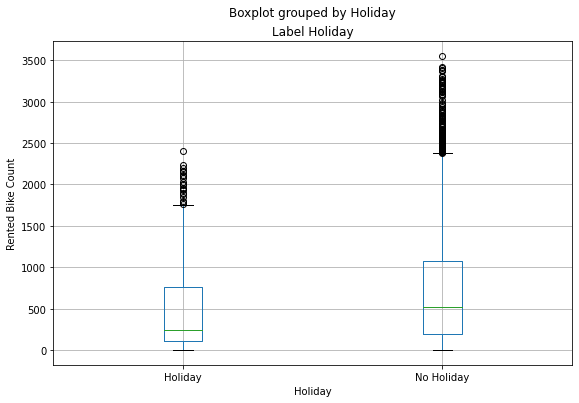

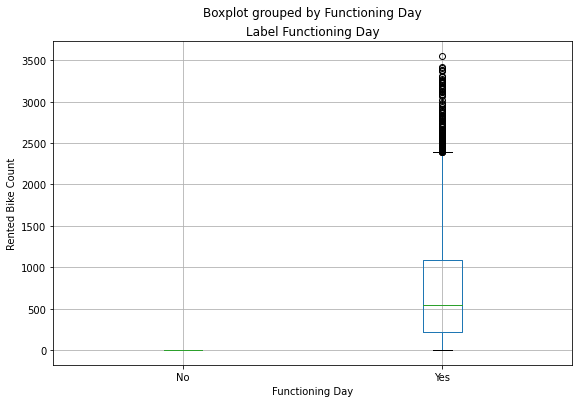

In [135]:
for col in categorical_features[1:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  dataset.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
  ax.set_title('Label '+col)
  ax.set_ylabel('Rented Bike Count')
plt.show()

In [136]:
## Data encoding

encoders_num = {'Holiday':{'Holiday':1, 'No Holiday':0},
                'Functioning Day':{'No':1, 'Yes':0}}

In [137]:
dataset = dataset.replace(encoders_num)

In [138]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,temp_dewtemp,hum_vis
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,0,-10.68,1214.8
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,0,-10.89,1215.2
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,0,-11.28,1215.6
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,0,-11.38,1216.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,0,-11.64,1214.4


In [139]:
# One hot encoding

dataset = pd.get_dummies(dataset, columns = ['Seasons'], prefix = ['seas'])

In [140]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,temp_dewtemp,hum_vis,seas_Autumn,seas_Spring,seas_Summer,seas_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,-10.68,1214.8,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,-10.89,1215.2,0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,-11.28,1215.6,0,0,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,-11.38,1216.0,0,0,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,-11.64,1214.4,0,0,0,1


In [141]:
dataset['Functioning Day'].value_counts()
#all values are 1. Hence variance is zero.
# we will not consider this column

0    8465
1     295
Name: Functioning Day, dtype: int64

In [104]:
dataset['Rainfall(mm)'].value_counts()

# out of total 8760 instances 0.0 mm rainfall for 8232 instances.

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
1.9        1
3.3        1
17.0       1
1.4        1
1.8        1
Name: Rainfall(mm), Length: 61, dtype: int64

In [144]:
dataset[dataset['Rainfall(mm)']<1]['Rented Bike Count']

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8446, dtype: int64

In [105]:
dataset['Rainfall(mm)'].var()

1.2728193746967844

In [106]:
dataset['Wind speed (m/s)'].value_counts()

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: Wind speed (m/s), Length: 65, dtype: int64

In [147]:
dataset[dataset['Wind speed (m/s)']>5]['Rented Bike Count']

85       391
87       341
89       515
249      326
253      241
933      146
974      177
1309     140
1409     178
1722     216
1723     151
1724     132
1791     295
2170     191
2174     375
2177     423
3042    1114
3065     908
3133     967
3134     913
3136    1080
3137    1004
3138    1805
3139    1153
3140     336
3141     133
3142      75
3181    1029
3712    1501
4188    1087
6316      49
6687    1131
7916    1003
7937    1176
8245       0
Name: Rented Bike Count, dtype: int64

In [107]:
dataset['Wind speed (m/s)'].var()

1.0739176763261125

In [152]:
dataset[dataset['Snowfall (cm)']>3]['Rented Bike Count']

223      20
224      35
225      31
226      19
227      58
228     119
417      52
418      36
419      44
420      62
421      76
422     116
423     137
1460     72
1461     60
1462     73
1463     62
1464     69
1465     96
1466     60
1467     47
1468     34
1469     34
1470     63
1471    124
1472    273
1473    137
1474    102
2017     55
2018     62
2019     32
2020     36
2021     39
2022     63
2023    174
2024    391
2025    214
2026    184
2027    230
8600     33
8601     24
8602     62
8603    114
8604    167
8605    241
8606    298
8607    330
8608    436
8609    435
8610    426
8611    420
8612    349
8613    392
8614    396
Name: Rented Bike Count, dtype: int64

In [193]:
Features = ['Hour', 'Rainfall(mm)' ,'Temperature(°C)', 'Snowfall (cm)',
            'hum_vis', 'Holiday', 'seas_Autumn', 'seas_Spring', 'seas_Summer', 'seas_Winter']

In [168]:
len(Features)

10

In [194]:
from scipy.stats import zscore

X = dataset[Features]

In [195]:
X

,Hour,Rainfall(mm),Temperature(°C),Snowfall (cm),hum_vis,Holiday,seas_Autumn,seas_Spring,seas_Summer,seas_Winter
0,0,0.0,-5.2,0.0,1214.8,0,0,0,0,1
1,1,0.0,-5.5,0.0,1215.2,0,0,0,0,1
2,2,0.0,-6.0,0.0,1215.6,0,0,0,0,1
3,3,0.0,-6.2,0.0,1216.0,0,0,0,0,1
4,4,0.0,-6.0,0.0,1214.4,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
8755,19,0.0,4.2,0.0,1150.0,0,1,0,0,0
8756,20,0.0,3.4,0.0,1214.8,0,1,0,0,0
8757,21,0.0,2.6,0.0,1196.4,0,1,0,0,0
8758,22,0.0,2.1,0.0,1131.8,0,1,0,0,0


In [196]:
# rented bike count isa right skewed
y = dataset['Rented Bike Count']

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 10)
(1752, 10)


In [88]:
np.all(np.isfinite(y))


True

In [64]:
np.any(np.isnan(y))

False

In [198]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression().fit(X_train, y_train)

In [199]:
reg.score(X_train, y_train)

0.46461069527150567

In [93]:
reg.coef_

array([  32.95208719,   31.90486846,  -76.9965202 ,   16.67897122,
        -19.58342886,    0.26653213, -121.28376259,   72.4619453 ,
         52.27758201,   71.78739939, -196.5269267 ])

In [94]:
len(reg.coef_)

11

In [95]:
reg.intercept_

-119.57642524231608

In [200]:
y_pred = reg.predict(X_test)

In [162]:
y_pred

array([ 532.14871093,  781.02968805,  628.65142123, ...,  433.34346124,
       1185.90954415,  410.84095639])

In [201]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)

In [202]:
MSE


235549.2326634818

In [203]:
np.sqrt(MSE)

485.3341453714974

In [204]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2: ', r2)


R2:  0.437188722517015


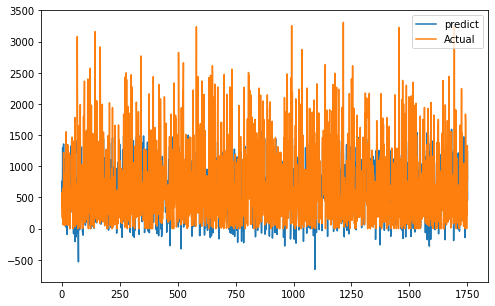

In [192]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(['predict', 'Actual'])
plt.show()